In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3eca5c9e82de47e5d031331b107ae04


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | novikovo
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | sulangan
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | bubaque
Processing Record 17 of Set 1 | coari
Processing Record 18 of Set 1 | morki
Processing Record 19 of Set 1 | svetlogorsk
Processing Record 20 of Set 1 | ulladulla
Processing Record 21 of Set 1 | rocha
Processing Record 22 of Set 1 | louisbourg
City not found. Skipping

City not found. Skipping...
Processing Record 40 of Set 4 | normandin
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | paita
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | port-de-bouc
Processing Record 46 of Set 4 | mahadday weyne
City not found. Skipping...
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | bambous virieux
Processing Record 50 of Set 4 | xifeng
Processing Record 1 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | roma
Processing Record 4 of Set 5 | sinfra
Processing Record 5 of Set 5 | nguiu
City not found. Skipping...
Processing Record 6 of Set 5 | sobolevo
Processing Record 7 of Set 5 | wenling
Processing Record 8 of Set 5 | mahebourg
Processing Record 9 of Set 5 | dikson
Processing Record 10 of Set 5 | malanje
Processing Record 11 of Set 

Processing Record 34 of Set 8 | halalo
City not found. Skipping...
Processing Record 35 of Set 8 | marienburg
Processing Record 36 of Set 8 | huescar
Processing Record 37 of Set 8 | okha
Processing Record 38 of Set 8 | salinas
Processing Record 39 of Set 8 | ambilobe
Processing Record 40 of Set 8 | edendale
Processing Record 41 of Set 8 | skofja loka
Processing Record 42 of Set 8 | minab
Processing Record 43 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 44 of Set 8 | pimenteiras
Processing Record 45 of Set 8 | lakselv
Processing Record 46 of Set 8 | avera
Processing Record 47 of Set 8 | arzgir
Processing Record 48 of Set 8 | norsup
Processing Record 49 of Set 8 | shubarshi
Processing Record 50 of Set 8 | batsfjord
Processing Record 1 of Set 9 | sorvag
City not found. Skipping...
Processing Record 2 of Set 9 | chumikan
Processing Record 3 of Set 9 | lakatoro
Processing Record 4 of Set 9 | balabac
Processing Record 5 of Set 9 | ambodifototra
City not found. Skipping...
Processin

Processing Record 19 of Set 12 | kargasok
Processing Record 20 of Set 12 | dzhebariki-khaya
Processing Record 21 of Set 12 | ovsyanka
Processing Record 22 of Set 12 | riyadh
Processing Record 23 of Set 12 | kheda
Processing Record 24 of Set 12 | margate
Processing Record 25 of Set 12 | raudeberg
Processing Record 26 of Set 12 | teguise
Processing Record 27 of Set 12 | smithers
Processing Record 28 of Set 12 | san juan
Processing Record 29 of Set 12 | tutoia
Processing Record 30 of Set 12 | santa cruz del sur
Processing Record 31 of Set 12 | sao felix do xingu
Processing Record 32 of Set 12 | huarmey
Processing Record 33 of Set 12 | tigre
Processing Record 34 of Set 12 | leshukonskoye
Processing Record 35 of Set 12 | mao
Processing Record 36 of Set 12 | samagaltay
Processing Record 37 of Set 12 | pemangkat
Processing Record 38 of Set 12 | jibuti
Processing Record 39 of Set 12 | orebro
Processing Record 40 of Set 12 | smirnykh
Processing Record 41 of Set 12 | jalu
Processing Record 42 of

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,73.42,68,0,10.40,UY,2021-02-06 22:23:56
1,Rikitea,-23.1203,-134.9692,78.19,70,100,9.95,PF,2021-02-06 22:25:11
2,Kapaa,22.0752,-159.3190,73.99,49,20,6.91,US,2021-02-06 22:28:30
3,Saint-Philippe,-21.3585,55.7679,78.80,83,40,4.61,RE,2021-02-06 22:25:57
4,Punta Arenas,-53.1500,-70.9167,57.20,51,75,24.16,CL,2021-02-06 22:28:30
5,Hobart,-42.8794,147.3294,64.00,59,75,12.66,AU,2021-02-06 22:27:21
6,Bluff,-46.6000,168.3333,59.63,69,2,1.77,NZ,2021-02-06 22:24:12
7,Busselton,-33.6500,115.3333,57.99,97,100,3.00,AU,2021-02-06 22:27:32
8,Novikovo,51.1537,37.8879,5.31,91,100,10.98,RU,2021-02-06 22:28:30
9,Yellowknife,62.4560,-114.3525,-34.01,61,1,4.61,CA,2021-02-06 22:25:38


In [12]:
# Rearrange DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2021-02-06 22:23:56,-33.6971,-53.4616,73.42,68,0,10.40
1,Rikitea,PF,2021-02-06 22:25:11,-23.1203,-134.9692,78.19,70,100,9.95
2,Kapaa,US,2021-02-06 22:28:30,22.0752,-159.3190,73.99,49,20,6.91
3,Saint-Philippe,RE,2021-02-06 22:25:57,-21.3585,55.7679,78.80,83,40,4.61
4,Punta Arenas,CL,2021-02-06 22:28:30,-53.1500,-70.9167,57.20,51,75,24.16
5,Hobart,AU,2021-02-06 22:27:21,-42.8794,147.3294,64.00,59,75,12.66
6,Bluff,NZ,2021-02-06 22:24:12,-46.6000,168.3333,59.63,69,2,1.77
7,Busselton,AU,2021-02-06 22:27:32,-33.6500,115.3333,57.99,97,100,3.00
8,Novikovo,RU,2021-02-06 22:28:30,51.1537,37.8879,5.31,91,100,10.98
9,Yellowknife,CA,2021-02-06 22:25:38,62.4560,-114.3525,-34.01,61,1,4.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

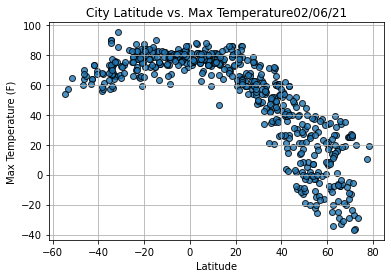

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

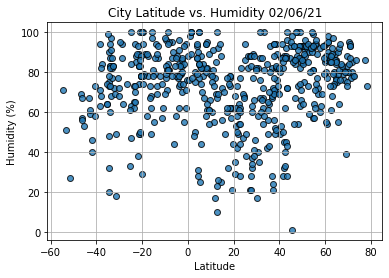

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

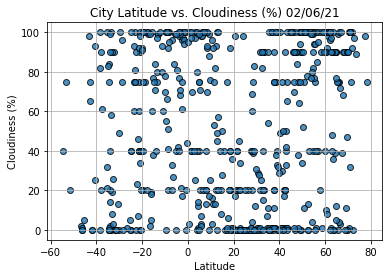

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

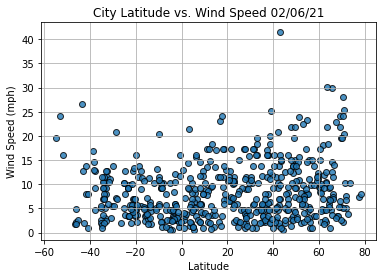

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
from scipy.stats import linregress

In [27]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                        Pevek
Country                        RU
Date          2021-02-06 22:28:31
Lat                       69.7008
Lng                       170.313
Max Temp                    -5.22
Humidity                       88
Cloudiness                     47
Wind Speed                   5.32
Name: 13, dtype: object

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Kapaa,US,2021-02-06 22:28:30,22.0752,-159.3190,73.99,49,20,6.91
8,Novikovo,RU,2021-02-06 22:28:30,51.1537,37.8879,5.31,91,100,10.98
9,Yellowknife,CA,2021-02-06 22:25:38,62.4560,-114.3525,-34.01,61,1,4.61
12,Sulangan,PH,2021-02-06 22:28:31,11.1373,123.7228,80.31,81,13,13.60
13,Pevek,RU,2021-02-06 22:28:31,69.7008,170.3133,-5.22,88,47,5.32


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

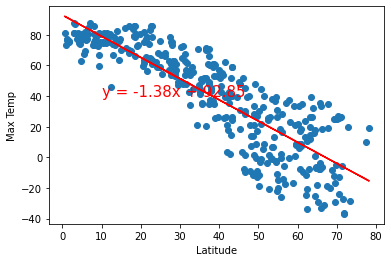

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

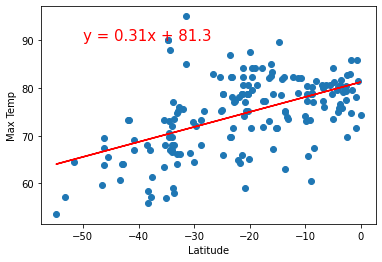

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))